# Average time spent by a user on social media

#### In this project, my aim is to analyze the average time spent by users on social media platforms. 

In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv('dummy_data.csv')
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [3]:
#Checking shape of df
df.shape

(1000, 12)

# Data Analysis and Visualisation

<AxesSubplot:>

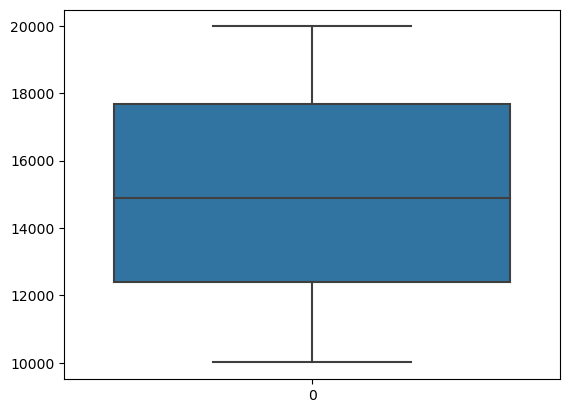

In [4]:
#checking outliers in target feature
sns.boxplot(data=df['income'])

In [5]:
#displaying sorted target feature values
sorted(df.time_spent.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
#Displaying df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [7]:
#Summary stats
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [8]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

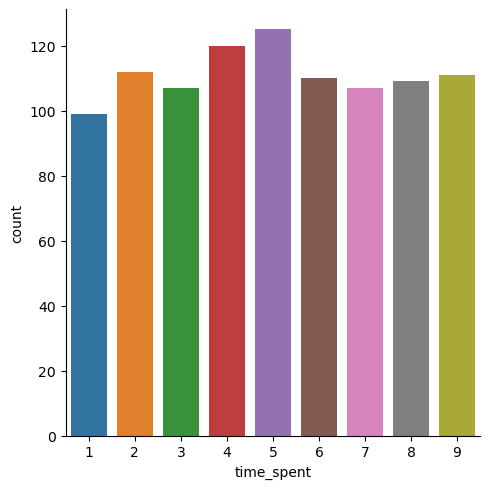

In [9]:
#graphical representation of number of observations in each category of target feature
sns.catplot(x='time_spent',data=df, kind='count')

In [10]:
#finding correlation between numeric columns in df
corr = df.corr()

<AxesSubplot:>

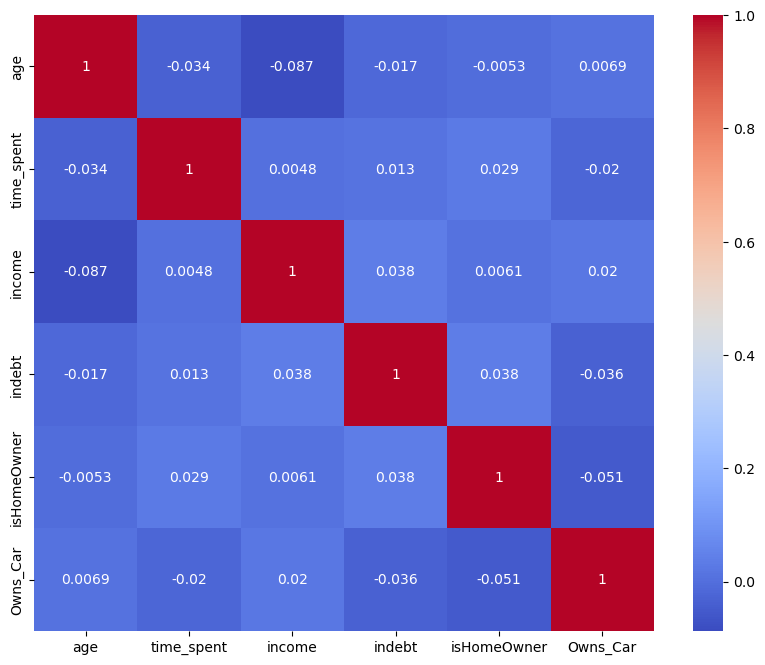

In [11]:
#plotting correlation with histogram
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='indebt', ylabel='time_spent'>

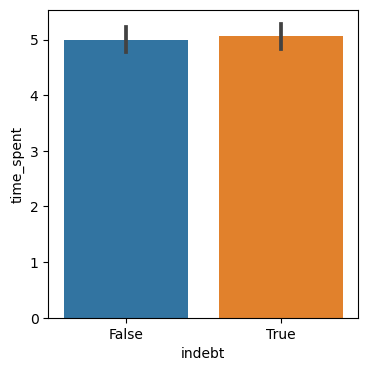

In [12]:
# Finding relationship between target variable and input features
plot = plt.figure(figsize=(4,4))
sns.barplot(x='indebt',y='time_spent',data=df)

<AxesSubplot:xlabel='location', ylabel='time_spent'>

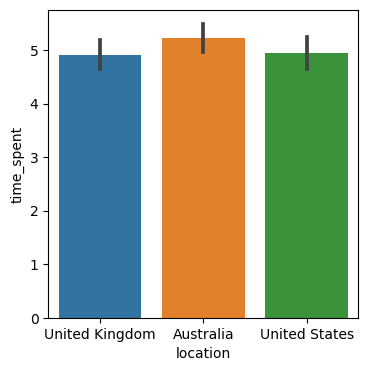

In [13]:
# time_spent vs location
plot = plt.figure(figsize=(4,4))
sns.barplot(x='location',y='time_spent',data=df)

<AxesSubplot:xlabel='age', ylabel='time_spent'>

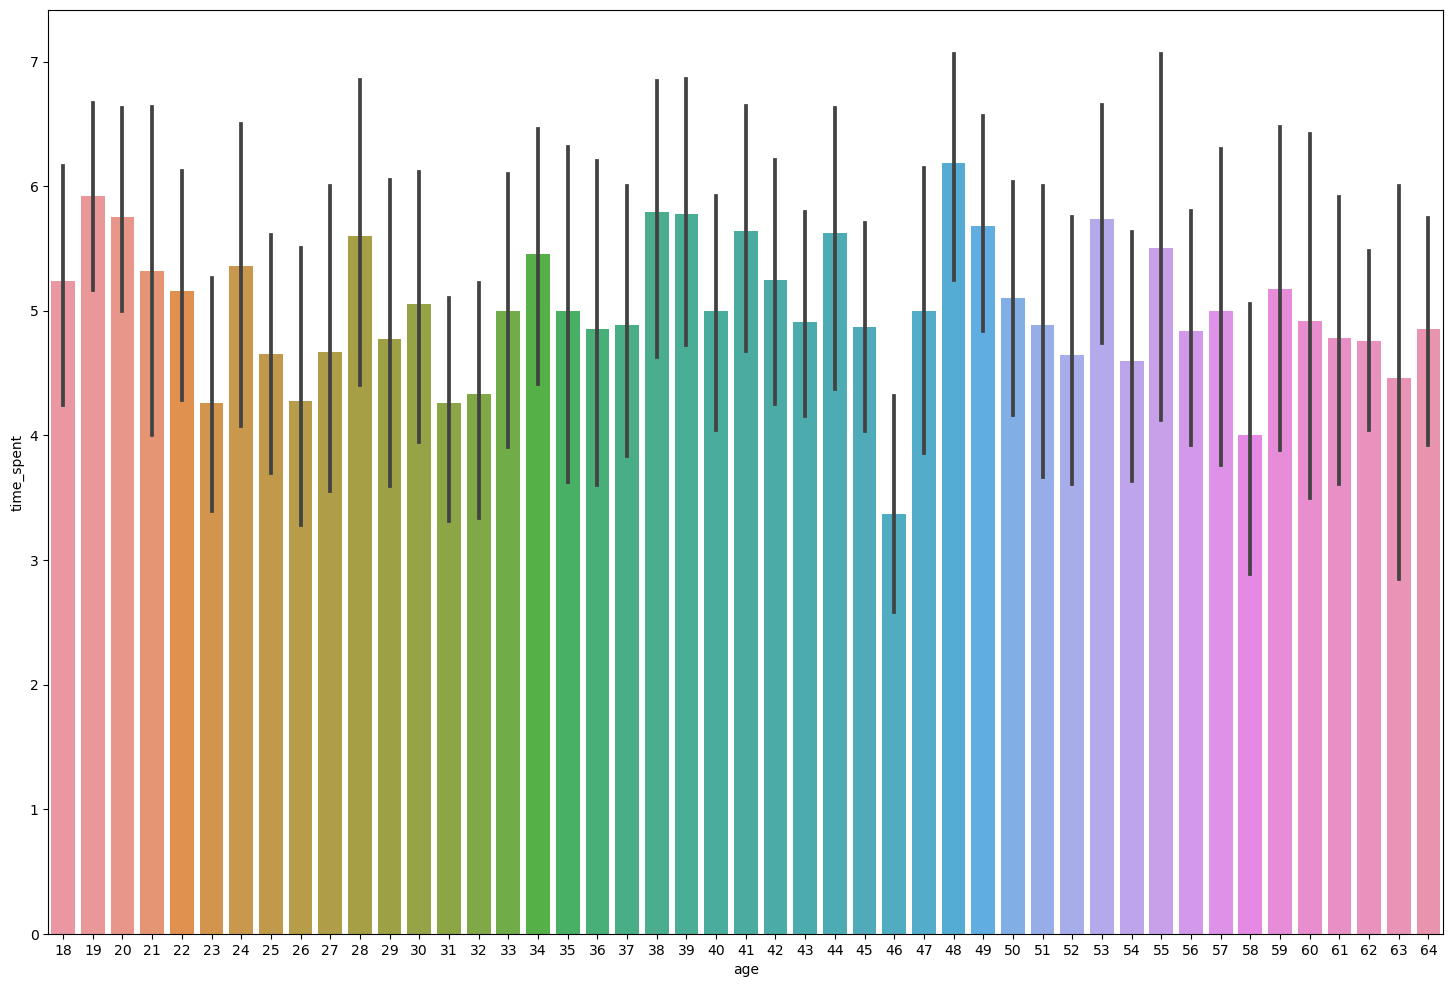

In [14]:
#time_spent vs age
plot = plt.figure(figsize=(18,12))
sns.barplot(x='age',y='time_spent',data=df)

In [15]:
### Feature engineering to increase accuracy in prediction

In [16]:
# classifying the age into bins
bins = [0,20,30,40,50,60,70]
labels = [1,2,3,4,5,6]
df.age = pd.cut(df['age'], bins=bins, labels=labels, right=False)
     
df.age.unique()

[5, 4, 3, 6, 2, 1]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [17]:
df.age.value_counts()

4    233
5    219
2    206
3    193
6    100
1     49
Name: age, dtype: int64

#### after analysis, we found that the input features are very less correlated
#### mapping the target variable as either more, avg and less time spender to increase prediction accuracy. 
 7 to 9 hours time spender as 3 </br>
 4 to 6 hours time spender as 2</br>
 1 to 3 hours time spender as 1

In [18]:
df.time_spent = df['time_spent'].apply(lambda hr: 3 if hr>6 else 1 if hr<4 else 2)
df.time_spent.unique()

array([1, 3, 2], dtype=int64)

# Encoding Categorical features

In [19]:
#Encoding indebt column 
df.indebt = df.indebt.replace({'False':0, 'True':1}).astype(int)
#Encoding isHomeOwner column 
df.isHomeOwner = df.isHomeOwner.replace({'False':0, 'True':1}).astype(int)
#Encoding Owns_Car column 
df.Owns_Car = df.Owns_Car.replace({'False':0, 'True':1}).astype(int)

In [20]:
# using onehot encoder to encode categorical features as numeric
encoder=OneHotEncoder(drop='first')
cat_cols = df.select_dtypes(include=['object']).columns
ohe = encoder.fit_transform(df[cat_cols])
ohe_df = pd.DataFrame(ohe.toarray(), columns=encoder.get_feature_names_out(df[cat_cols].columns))
df = pd.concat([df.drop(columns=df[cat_cols].columns),ohe_df], axis=1)

In [21]:
df.head()

,age,time_spent,income,indebt,isHomeOwner,Owns_Car,gender_male,gender_non-binary,platform_Instagram,platform_YouTube,interests_Sports,interests_Travel,location_United Kingdom,location_United States,demographics_Sub_Urban,demographics_Urban,profession_Software Engineer,profession_Student
0,5,1,19774,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,4,1,10564,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,3,3,13258,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6,2,12500,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,2,1,14566,0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Correlation analysis

In [22]:
# Finding correlation between all the features
correlation = df.corr()

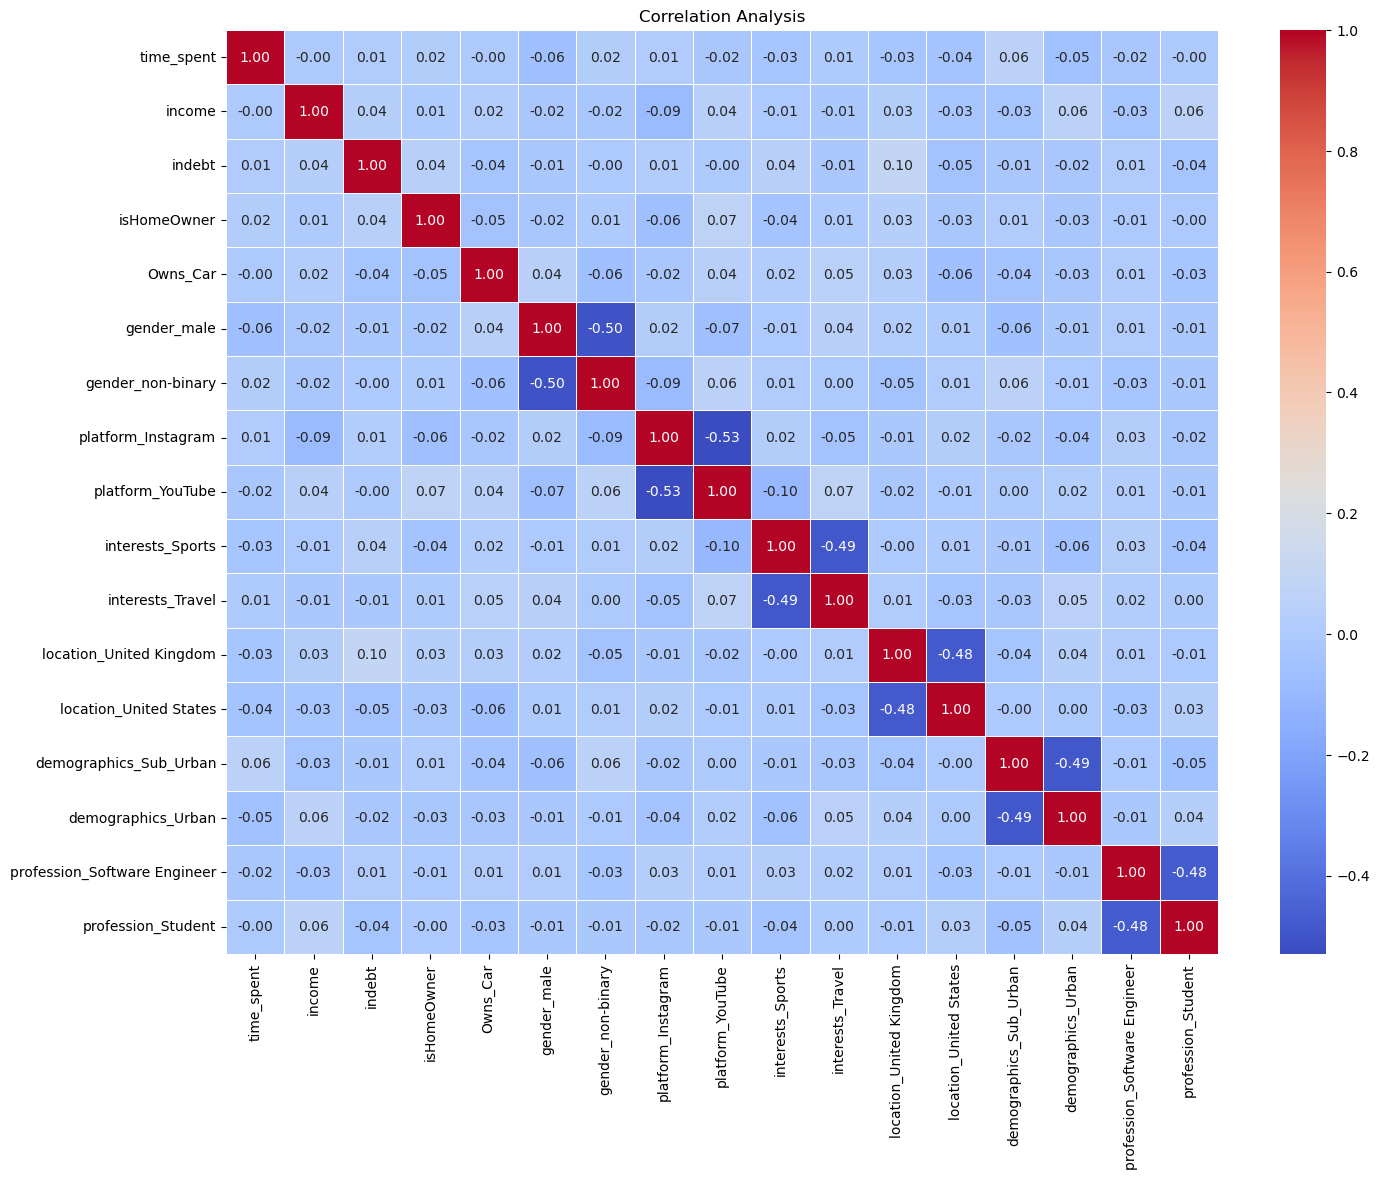

In [23]:
# Plotting correlation between all features using heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

# Splitting Training and testing data

In [24]:
#dropping income column as it is not correlated to target feature
#dropping time_spent to create X - independent features data
X = df.drop(['time_spent','income'],axis=1)
# target feature 
y = df['time_spent']
#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1 )

In [25]:
#testing shape of training and testing data
print(X.shape,'=',X_train.shape,'+',X_test.shape)

(1000, 16) = (800, 16) + (200, 16)


# Training and Testing the models
#### Finding Best Hyperparameters

In [26]:
# finding best hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [95, 91, 47],
    'random_state': [1, 100, 850],
    'max_features': [0.1, 0.3, 0.5],
    'min_samples_leaf': [2, 4, 6],
    'max_depth': [2, 10, 15],
    'min_samples_split': [2, 22, 32]
}

rf = RandomForestClassifier()
# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 47, 'random_state': 1}


### Random Forest

In [27]:
# modified hyperparameter
rf_model = RandomForestClassifier(n_estimators=40, random_state=2, max_features=0.5,min_samples_leaf=2, max_depth=2, min_samples_split=22)
# training the model
rf_model.fit(X_train, y_train)
test_pred = rf_model.predict(X_test)
#printing accuracy
print("Test Accuracy:", accuracy_score(y_test, test_pred)*100)

Test Accuracy: 42.5


In [28]:
#bias
print(np.mean(test_pred - y_test))

0.02


In [29]:
#variance
print(y_test.var())

0.6482160804020095


### Logistic Regression

In [30]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=2, max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)

Logistic Regression Accuracy: 40.5


### Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=2, C=1.0, gamma='scale')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, svc_pred)*100)

SVM Accuracy:  35.0


## Analysis Note:
### Overview
In this analysis, I have evaluated three machine learning models<br/>
    —Random Forest, Logistic Regression, and Support Vector Machine (SVM)—for a classification task. 

### Results
Random Forest: Achieved an accuracy of 42.5%<br/>
Logistic Regression: Achieved an accuracy of 40.5%<br/>
Support Vector Machine (SVM): Achieved an accuracy of 35%<br/>
### Interpretation
- The Random Forest model outperformed both Logistic Regression and SVM in terms of accuracy.
- While Random Forest achieved the highest accuracy, it is important to note that the overall accuracy of all models is relatively low, indicating that the models may not be capturing the underlying patterns in the data effectively.
- Further analysis is required to understand why the models are not performing well and to explore additional feature engineering, model tuning, or alternative algorithms to improve performance.